# Curso Deep Learning 360 - Nivel 1

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado por [Pablo Casas](https://twitter.com/pabloc_ds) | [Escuela de Datos Vivos](https://escueladedatosvivos.ai/)

Resuelto por Pablo Sotomayor

---

## Modelo de clasifiación en Keras 


## Ejercicios

A) Usar el optimizador Adam. Crear `model2`. 

Probar los learning rate: 0.1, 0.001, 0.0005

B) ¿Se estabiliza en alguno?

C) ¿Se estabiliza en alguna época? Hablar del early stopping

_Nota: La solución final esta en la Etapa 3 de este curso._

In [44]:
# Librerías que utilizaremos

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow import keras
from funpymodeling.exploratory import status, freq_tbl, profiling_num, cat_vars, num_vars
from funpymodeling.data_prep import todf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

Carga de datos

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/pablo14/datasets/main/heart_disease/heart_disease.csv')

print(f"Cantidad de registros: {data.shape[0]}")
print(f"Cantidad de variables: {data.shape[1]}")

Cantidad de registros: 303
Cantidad de variables: 16


Inspeccionamos los datos eligiendo una muestra al azar

In [47]:
data.head()

,age,gender,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electro,max_heart_rate,exer_angina,oldpeak,slope,num_vessels_flour,thal,heart_disease_severity,exter_angina,has_heart_disease
0,63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0,no
1,67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1,yes
2,67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1,yes
3,37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0,no
4,41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0,no


Revisamos el estado de los datos

In [48]:
print(f"Cantidad de variables numéricas: {len(num_vars(data))}")
print(f"Cantidad de variables categóricas: {len(cat_vars(data))}")
status(data).sort_values(by=["p_nan", "p_zeros", "unique"], ascending=False)

Cantidad de variables numéricas: 14
Cantidad de variables categóricas: 2


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
11,num_vessels_flour,4,0.013201,176,0.580858,4,float64
12,thal,2,0.006601,0,0.000000,3,float64
5,fasting_blood_sugar,0,0.000000,258,0.851485,2,int64
8,exer_angina,0,0.000000,204,0.673267,2,int64
14,exter_angina,0,0.000000,204,0.673267,2,int64
13,heart_disease_severity,0,0.000000,164,0.541254,5,int64
6,resting_electro,0,0.000000,151,0.498350,3,int64
9,oldpeak,0,0.000000,99,0.326733,40,float64
4,serum_cholestoral,0,0.000000,0,0.000000,152,int64
7,max_heart_rate,0,0.000000,0,0.000000,91,int64


Vemos que la variable "num_vessels_flour" tiene el 1.3% del total de datos como nulos, y la variable thal el 0.7%

Eliminamos los registros con datos nulos

In [49]:
data = data.dropna()

In [50]:
status(data).sort_values(by=["type"], ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
1,gender,0,0.0,0,0.000000,2,object
15,has_heart_disease,0,0.0,0,0.000000,2,object
0,age,0,0.0,0,0.000000,41,int64
2,chest_pain,0,0.0,0,0.000000,4,int64
3,resting_blood_pressure,0,0.0,0,0.000000,50,int64
4,serum_cholestoral,0,0.0,0,0.000000,152,int64
5,fasting_blood_sugar,0,0.0,254,0.855219,2,int64
6,resting_electro,0,0.0,147,0.494949,3,int64
7,max_heart_rate,0,0.0,0,0.000000,91,int64
8,exer_angina,0,0.0,200,0.673401,2,int64


Vemos que no hay más datos nulos en el dataframe

Generamos un nuevo atributo "target" a partir del atributo categórico "has_heart_disease". La variable "target" es numérica.

In [55]:
data["target"] = data["has_heart_disease"].replace("no", 0).replace("yes", 1) 

In [56]:
data["target"].value_counts()

0    160
1    137
Name: target, dtype: int64

Generamos un dataframe con las variables independientes de interés

In [57]:
data_x = data.drop(['target','heart_disease_severity','gender','has_heart_disease'], axis=1)

In [59]:
status(data_x)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,41,int64
1,chest_pain,0,0.0,0,0.000000,4,int64
2,resting_blood_pressure,0,0.0,0,0.000000,50,int64
3,serum_cholestoral,0,0.0,0,0.000000,152,int64
4,fasting_blood_sugar,0,0.0,254,0.855219,2,int64
5,resting_electro,0,0.0,147,0.494949,3,int64
6,max_heart_rate,0,0.0,0,0.000000,91,int64
7,exer_angina,0,0.0,200,0.673401,2,int64
8,oldpeak,0,0.0,96,0.323232,40,float64
9,slope,0,0.0,0,0.000000,3,int64


Vemos que son todas variables numéricas

Generamos un Serie con la variable a predecir, transformada a categórica con keras

In [58]:
data_y = to_categorical(data['target'], num_classes=2)

Normalizamos los datos de las variables independientes

In [60]:
scaler = MinMaxScaler()
data_x = scaler.fit_transform(data_x)

Revisamos los datos normalizados

In [64]:
data_x

array([[0.70833333, 0.        , 0.48113208, ..., 0.        , 0.75      ,
        0.        ],
       [0.79166667, 1.        , 0.62264151, ..., 1.        , 0.        ,
        1.        ],
       [0.79166667, 1.        , 0.24528302, ..., 0.66666667, 1.        ,
        1.        ],
       ...,
       [0.8125    , 1.        , 0.47169811, ..., 0.66666667, 1.        ,
        0.        ],
       [0.58333333, 1.        , 0.33962264, ..., 0.33333333, 1.        ,
        1.        ],
       [0.58333333, 0.33333333, 0.33962264, ..., 0.33333333, 0.        ,
        0.        ]])

Separamos la Serie data_x en TR/TS considerando 20% para los valores de validación

In [65]:
x_tr, x_ts, y_tr, y_ts = train_test_split(data_x, 
                                          data_y, 
                                          test_size=0.2,
                                          random_state=0)

Revisamos las dimensiones de x_tr y de y_tr

In [66]:
x_tr.shape

(237, 13)

In [67]:
y_tr.shape

(237, 2)

Creación del modelo

Definimos un modelo secuencial y agregamos capas densas (se conectan todas con todas)

In [198]:
model = Sequential()

_,in_shape=x_tr.shape

model.add(Dense(100, input_dim=in_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

- La capa de entrada tiene 13 neuronas de entrada y de salida tiene 100 neuronas. Es una capa densa, se conectan los 13 inputs con 100 neuronas.

- En la segunda capa las neuronas de salida de la primera capa se conectan con otras 100 neuronas.

- En la tercera capa las neuronas de salida de la segunda capa se conectan con 2 neuronas, se denomina capa de salida. Son dos neuronas pues son dos las variables a predecir.

Compilación del modelo:

Definimos como vamos a entrenar al modelo que definimos

Le asociamos un optimizador y una función de loss. La métrica de accuracy no se utiliza para entrenar al modelo, es para que aparezca en pantalla.

Usaremos el optimizador adagrad y una tasa de aprendizaje de 0.01. 

In [199]:
opt = keras.optimizers.Adagrad(learning_rate=0.01)

model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Visualizamos el modelo construido

In [200]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 100)               1400      
                                                                 
 dense_46 (Dense)            (None, 100)               10100     
                                                                 
 dense_47 (Dense)            (None, 2)                 202       
                                                                 
Total params: 11,702
Trainable params: 11,702
Non-trainable params: 0
_________________________________________________________________


Otra visualización del modelo

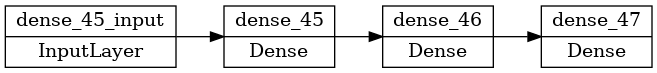

In [201]:
keras.utils.plot_model(model, show_shapes=False, rankdir="LR")

Entrenamos al modelo considerando 40 épocas y un batch_size=32

In [202]:
history = model.fit(x_tr, y_tr, validation_data=(x_ts, y_ts), epochs=40, batch_size=32, verbose=0)

Graficamos el resultado obtenido.

In [203]:
arr1 = history.history['accuracy']
arr2 = history.history['val_accuracy']
arr3 = history.history['loss']
arr4 = history.history['val_loss']

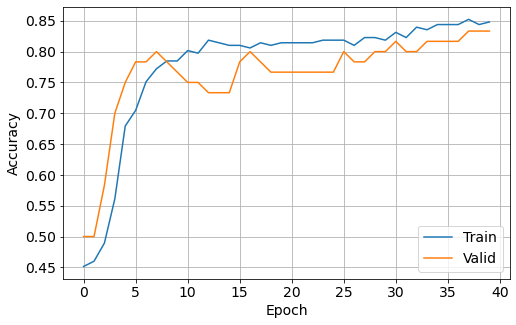

In [204]:
plt.figure(figsize=(8,5))
plt.plot(history.epoch, arr1, label='Train')
plt.plot(history.epoch, arr2, label='Valid')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

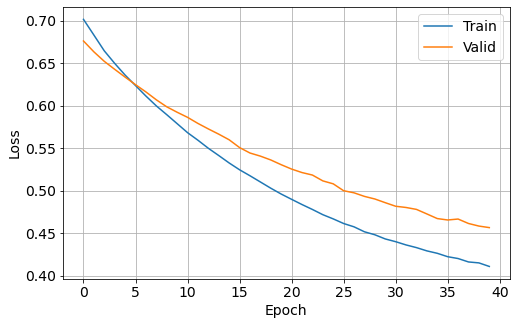

In [205]:
plt.figure(figsize=(8,5))
plt.plot(history.epoch, arr3, label='Train')
plt.plot(history.epoch, arr4, label='Valid')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

Podemos ver de las curvas de "Accuracy" que a medida que pasa el tiempo de entrenamiento, incrementa el aprendizaje del modelo. Las curvas de entrenamiento y validación convergen a 0.85.
De las curvas de "Loss" encontramos que se debe detener el entrenamiento en la época 5 aproximadamente, más allá se genera overfitting.

Para el resto de modelos definimos una función

In [206]:
def model_fit(x_tr, y_tr, x_ts, y_ts, inputDim, neuronsHL1, neuronsHL2, outputDim, learningRate):

    model = Sequential()
    model.add(Dense(neuronsHL1, input_dim=inputDim))
    model.add(Dense(neuronsHL2, activation='relu'))
    model.add(Dense(outputDim, activation='softmax'))
    
    opt = keras.optimizers.Adagrad(learning_rate=learningRate)

    model.compile(optimizer=opt, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_tr, y_tr, validation_data=(x_ts, y_ts), epochs=40, batch_size=32, verbose=0)
    
    arr1 = history.history['accuracy']
    arr2 = history.history['val_accuracy']
    arr3 = history.history['loss']
    arr4 = history.history['val_loss']
    
    plt.figure(figsize=(8,5))
    plt.plot(history.epoch, arr1, label='Train')
    plt.plot(history.epoch, arr2, label='Valid')
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.grid()
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(history.epoch, arr3, label='Train')
    plt.plot(history.epoch, arr4, label='Valid')
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.grid()
    plt.show()
    
    return

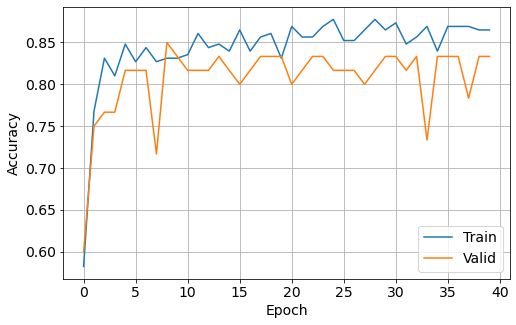

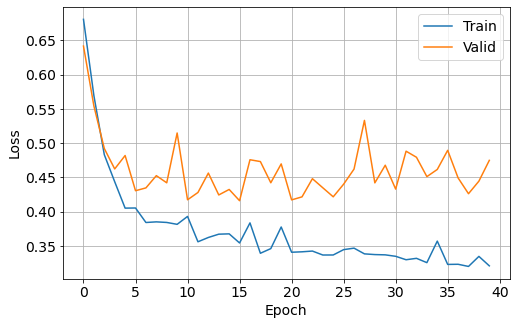

In [208]:
model_fit(x_tr, y_tr, x_ts, y_ts, inputDim=13, neuronsHL1=100, neuronsHL2=100, outputDim=2, learningRate=0.1)

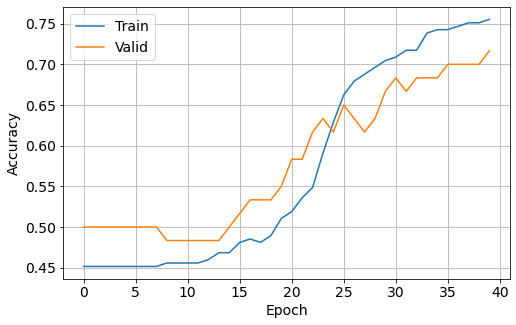

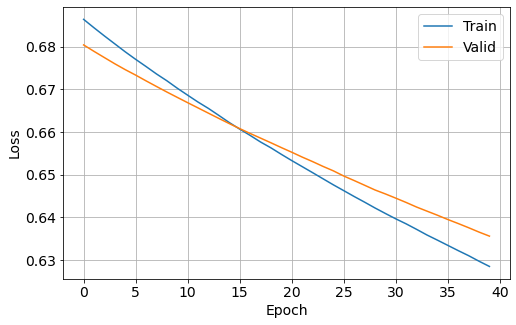

In [209]:
model_fit(x_tr, y_tr, x_ts, y_ts, inputDim=13, neuronsHL1=100, neuronsHL2=100, outputDim=2, learningRate=0.001)

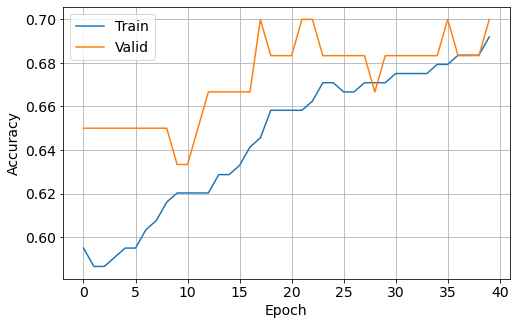

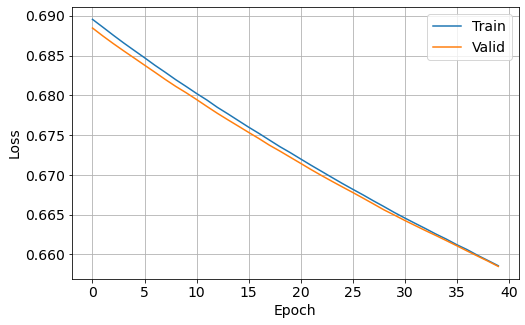

In [210]:
model_fit(x_tr, y_tr, x_ts, y_ts, inputDim=13, neuronsHL1=100, neuronsHL2=100, outputDim=2, learningRate=0.0005)

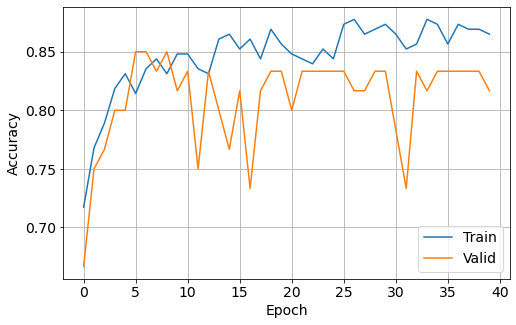

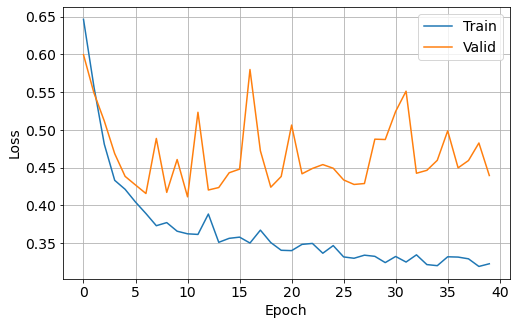

In [211]:
model_fit(x_tr, y_tr, x_ts, y_ts, inputDim=13, neuronsHL1=50, neuronsHL2=50, outputDim=2, learningRate=0.1)

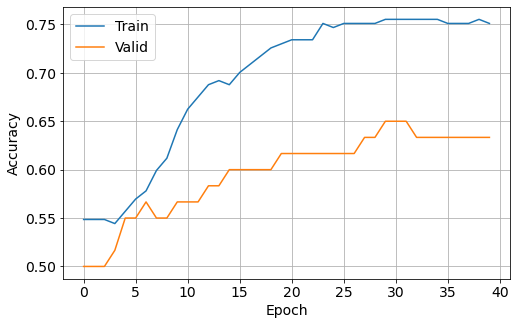

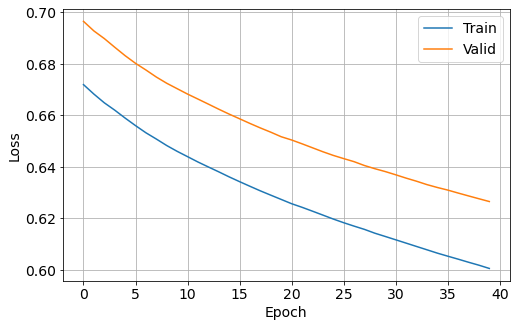

In [212]:
model_fit(x_tr, y_tr, x_ts, y_ts, inputDim=13, neuronsHL1=50, neuronsHL2=50, outputDim=2, learningRate=0.001)

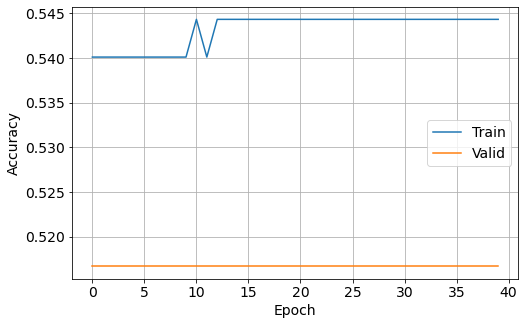

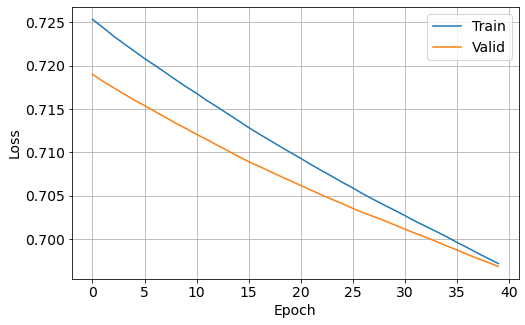

In [213]:
model_fit(x_tr, y_tr, x_ts, y_ts, inputDim=13, neuronsHL1=50, neuronsHL2=50, outputDim=2, learningRate=0.0005)

De los modelos desplegados anteriormente podemos ver que el caso más óptimo corresponde a una tasa de aprendizaje de 0.01, y 100 neuronas en cada capa oculta.